## 接線形モデルとアジョイントモデルの練習

In [1]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import csv

### Euler法

In [2]:
#Euler
def F(x,y):
    return x*y

def Euler(xin,yin,h):
    xout = xin + h
    yout = yin + h*F(xin,yin)
    return xout,yout

In [3]:
def Rungekutta2(xin,yin,h):
    K1 = h * F(xin,yin)
    
    x2 = xin + h
    y2 = yin + K1
    K2 = h * F(x2,y2) - K1
    
    xout = x2
    yout = y2 + K2/2
    
    return xout,yout

In [2]:
def Rungekutta4(xin,yin,h):
    K1 = h * F(xin,yin)
    
    x2 = xin + h/2
    y2 = yin + K1/2
    K2 = h * F(x2,y2)
    
    x3 = xin + h/2
    y3 = yin + K2/2
    K3 = h * F(x3,y3)
    
    x4 = xin + h
    y4 = yin + K3
    K4 = h * F(x4,y4)
    
    xout = xin + h
    yout = yin + K1/6 + K2/3 + K3/3 + K4/6
    
    return xout,yout



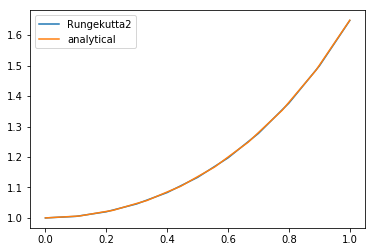

In [47]:
h=0.1
X=[0]
Y=[1]
Xr2=[0]
Yr2=[1]
Xr=[0]
Yr=[1]
for i in range(10):
    (x,y) = Euler(X[-1],Y[-1],h)
    (xr2,yr2) = Rungekutta2(Xr2[-1],Yr2[-1],h)
    (xr,yr) = Rungekutta4(Xr[-1],Yr[-1],h)
    X.append(x)
    Y.append(y)
    Xr2.append(xr2)
    Yr2.append(yr2)
    Xr.append(xr)
    Yr.append(yr)

x_a = np.linspace(0,Xr[-1],10)
y_a = np.exp(x_a*x_a/2)

#plt.plot(X,Y,label="Euler")
plt.plot(Xr2,Yr2,label="Rungekutta2")
#plt.plot(Xr,Yr,label="Rungekutta4")
plt.plot(x_a,y_a,label="analytical")
plt.legend()
plt.show()

In [29]:
def Euler_t(x0,y0,x1,y1,h):
    X1 = x1
    Y1 = h*y0*x1 + (1+h*x0)*y1
    return X1,Y1

h=0.01
a=1e-6
x0=0
y0=1
x1=0.001
y1=0.001

(xa,ya)=Euler(x0+a*x1,y0+a*y1,h)
Adx = np.array([xa,ya])
(x,y)=Euler(x0,y0,h)
Ax = np.array([x,y])

(dx,dy)=Euler_t(x0,y0,x1,y1,h)
JAx = np.array([dx,dy])

print(Adx,Ax,JAx)

d = np.linalg.norm(Adx-Ax)/(a*np.linalg.norm(JAx))
print(a)
print((d-1)/a)

[0.01 1.  ] [0.01 1.  ] [0.001   0.00101]
1e-06
0.041521260429888684


In [15]:
def Euler_adj(X1,Y1,x0,y0,h):
    x1 = X1 + h*y0*Y1
    y1 = (1+h*x0)*Y1
    return x1,y1

h=0.05
a=1e-5
x0=0
y0=1
x1=0.001
y1=0.001
X = np.array([x1,y1])

(xt,yt)=Euler_t(x0,y0,x1,y1,h)
Ax = np.array([xt,yt])

(x_adj,y_adj) = Euler_adj(xt,yt,x0,y0,h)
AtAx = np.array([x_adj,y_adj])

print(X,Ax,AtAx)

d = Ax.T @ Ax - X.T @ AtAx
print(Ax.T @ Ax , X.T @ AtAx, d)

[0.001 0.001] [0.001   0.00105] [0.0010525 0.00105  ]
2.1024999999999998e-06 2.1024999999999998e-06 0.0


### Rungekutta法（2次、4次）

In [21]:
def F_t(x0,y0,x1,y1):
    return y0*x1+x0*y1

def Rungekutta2_t(x0,y0,x1,y1,h):
    K1 = h*F(x0,y0)
    dK1 = h*F_t(x0,y0,x1,y1)
    
    x2 = x0+h
    y2 = y0+K1
    dx2 = x1
    dy2 = y1+dK1
    dK2 = h*F_t(x2,y2,dx2,dy2)-dK1
    
    X1 = dx2
    Y1 = dy2 + dK2/2
    
    return X1,Y1

h=0.01
a=1e-5
x0=0
y0=1
x1=0.001
y1=0.001

(xa,ya)=Rungekutta2(x0+a*x1,y0+a*y1,h)
Adx = np.array([xa,ya])
(x,y)=Rungekutta2(x0,y0,h)
Ax = np.array([x,y])

(dx,dy)=Rungekutta2_t(x0,y0,x1,y1,h)
JAx = np.array([dx,dy])

print(Adx,Ax,JAx)

d = np.linalg.norm(Adx-Ax)/(a*np.linalg.norm(JAx))
print(a)
print((d-1)/a)

[0.01000001 1.00005001] [0.01    1.00005] [0.001      0.00101005]
1e-05
-0.0006156085752273555


In [22]:
def F_adj(K,x0):
    return K*x0

def Rungekutta2_adj(X1,Y1,x0,y0,h):
    K1 = h*F(x0,y0)
    x2 = x0 + h
    y2 = y0 + K1
    
    dx2 = X1
    dy2 = Y1
    dK2 = Y1/2
    
    dK1 = -dK2
    dx2 = dx2 + h*F_adj(dK2,y2)
    dy2 = dy2 + h*F_adj(dK2,x2)
    
    x1 = dx2
    y1 = dy2
    dK1 = dK1 + dy2
    
    dx1 = h*F_adj(dK1,y0)
    dy1 = h*F_adj(dK1,x0)
    x1 = x1 + dx1
    y1 = y1 + dy1
    
    return x1,y1

h=0.01
a=1e-5
x0=1
y0=1
x1=0.001
y1=0.001
X = np.array([x1,y1])

(xt,yt)=Rungekutta2_t(x0,y0,x1,y1,h)
Ax = np.array([xt,yt])

(x_adj,y_adj) = Rungekutta2_adj(xt,yt,x0,y0,h)
AtAx = np.array([x_adj,y_adj])

print(X,Ax,AtAx)

d = (Ax.T @ Ax - X.T @ AtAx)
print(Ax.T @ Ax , X.T @ AtAx, d)

[0.001 0.001] [0.001     0.0010202] [0.0010103  0.00103051]
2.040810080401e-06 2.040810080401e-06 0.0


In [15]:
def F_t(x0,y0,x1,y1):
    return y0*x1+x0*y1

def Rungekutta4_t(x0,y0,x1,y1,h):
    K1 = h*F(x0,y0)
    dK1 = h*F_t(x0,y0,x1,y1)
    
    x2 = x0 + h/2
    y2 = y0 + K1/2
    dx2 = x1
    dy2 = y1+dK1/2
    K2 = h*F(x2,y2)
    dK2 = h*F_t(x2,y2,dx2,dy2)
    
    x3 = x0 + h/2
    y3 = y0 + K2/2
    dx3 = x1
    dy3 = y1+dK2/2
    K3 = h*F(x3,y3)
    dK3 = h*F_t(x3,y3,dx3,dy3)
    
    x4 = x0 + h
    y4 = y0 + K3
    dx4 = x1
    dy4 = y1+dK3
    K4 = h*F(x4,y4)
    dK4 = h*F_t(x4,y4,dx4,dy4)
    
    X1 = x1
    Y1 = y1 + dK1/6 + dK2/3 + dK3/3 + dK4/6
    
    return X1,Y1

h=0.05
a=1e-5
x0=1
y0=1
x1=0.001
y1=0.001

(xa,ya)=Rungekutta4(x0+a*x1,y0+a*y1,h)
Adx = np.array([xa,ya])
(x,y)=Rungekutta4(x0,y0,h)
Ax = np.array([x,y])

(dx,dy)=Rungekutta4_t(x0,y0,x1,y1,h)
JAx = np.array([dx,dy])

print(Adx,Ax,JAx)

d = np.linalg.norm(Adx-Ax)/(a*np.linalg.norm(JAx))
print(a)
print((d-1)/a)

[1.05000001 1.05258601] [1.05     1.052586] [0.001      0.00110522]
1e-05
0.00011536047672677795


In [3]:
def Rungekutta4_adj(X1,Y1,x0,y0,h):
    K1 = h*F(x0,y0)
    
    x2 = x0 + h/2
    y2 = y0 + K1/2
    K2 = h*F(x2,y2)
    
    x3 = x0 + h/2
    y3 = y0 + K2/2
    K3 = h*F(x3,y3)
    
    x4 = x0 + h
    y4 = y0 + K3
    K4 = h*F(x4,y4)
    
    x1 = X1
    y1 = Y1
    dK1 = Y1/6
    dK2 = Y1/3
    dK3 = Y1/3
    dK4 = Y1/6
    #print(x1,y1,dK1,dK2,dK3,dK4)
       
    x1 = x1 + h*y4*dK4
    y1 = y1 + h*x4*dK4
    dK1 = dK1
    dK2 = dK2
    dK3 = dK3 + h*x4*dK4
    #print(x1,y1,dK1,dK2,dK3)
        
    x1 = x1 + h*y3*dK3
    y1 = y1 + h*x3*dK3
    dK1 = dK1
    dK2 = dK2 + h*x3*dK3/2
    #print(x1,y1,dK1,dK2)
        
    x1 = x1 + h*y2*dK2
    y1 = y1 + h*x2*dK2
    dK1 = dK1 + h*x2*dK2/2
    #print(x1,dK1,dK2)
        
    x1 = x1 + h*y0*dK1
    y1 = y1 + h*x0*dK1
    #print(x1,y1)
    
    return x1,y1

h=0.01
a=1e-5
x0=1
y0=1
x1=0.001
y1=0.001
X = np.array([x1,y1])

(xt,yt)=Rungekutta4_t(x0,y0,x1,y1,h)
Ax = np.array([xt,yt])

(x_adj,y_adj) = Rungekutta4_adj(xt,yt,x0,y0,h)
AtAx = np.array([x_adj,y_adj])

print(X,Ax,AtAx)

d = (Ax.T @ Ax) - (X.T @ AtAx)
print(Ax.T @ Ax , X.T @ AtAx, d)

NameError: name 'Rungekutta4_t' is not defined

### Lorenz96モデル

In [8]:
def L96(Xa,F):
    
    return (np.roll(Xa, -1,axis=0) - np.roll(Xa, 2,axis=0)) * np.roll(Xa, 1,axis=0) -  Xa + F

In [9]:
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

In [10]:
def L96_t(X0,X1,F):
    return (np.roll(X0,-1,axis=0) - np.roll(X0,2,axis=0))*np.roll(X1,1,axis=0) + (np.roll(X1,-1,axis=0) - np.roll(X1,2,axis=0))*np.roll(X0,1,axis=0) - X1

def Rungekutta4_t(X0,X1,h,F):
    N=len(X0)
    
    K1 = h*L96(X0,F)
    dK1 = h*L96_t(X0,X1,F)
    
    X2 = X0 + K1/2
    dX2 = X1 + dK1/2
    K2 = h*L96(X2,F)
    dK2 = h*L96_t(X2,dX2,F)
    
    X3 = X0 + K2/2
    dX3 = X1 + dK2/2
    K3 = h*L96(X3,F)
    dK3 = h*L96_t(X3,dX3,F)
    
    X4 = X0 + K3
    dX4 = X1 + dK3
    K4 = h*L96(X4,F)
    dK4 = h*L96_t(X4,dX4,F)
    
    dXb = X1 + dK1/6 + dK2/3 + dK3/3 + dK4/6
    
    return dXb

In [12]:
h=0.05
F=8
a=1e-5
X0 = np.random.randn(40).reshape(-1,1)
X1 = np.random.rand(40,10)/100

Adx = Rungekutta4(X0+a*X1,h,F)
Ax = Rungekutta4(X0,h,F)

JAx = Rungekutta4_t(X0,X1,h,F)

print(Adx,Ax,JAx)

d = np.linalg.norm(Adx-Ax)/(a*np.linalg.norm(JAx))
print(a)
print(d)

[[-0.67148136 -0.67148133 -0.67148135 -0.67148134 -0.67148136 -0.67148138
  -0.67148142 -0.67148141 -0.67148134 -0.67148137]
 [ 1.12893861  1.12893868  1.12893866  1.12893861  1.12893865  1.12893865
   1.12893863  1.12893865  1.12893868  1.12893868]
 [ 0.16878799  0.16878798  0.16878797  0.16878791  0.16878797  0.16878796
   0.16878798  0.16878797  0.16878793  0.16878801]
 [-0.06892541 -0.0689254  -0.06892543 -0.06892543 -0.06892547 -0.06892542
  -0.06892539 -0.06892538 -0.0689254  -0.06892542]
 [-0.1632194  -0.16321938 -0.16321938 -0.16321937 -0.16321941 -0.16321937
  -0.16321938 -0.16321936 -0.16321934 -0.16321933]
 [ 1.43556431  1.4355643   1.43556431  1.43556434  1.43556428  1.43556433
   1.43556435  1.43556434  1.43556432  1.43556436]
 [ 2.61880876  2.61880874  2.6188088   2.61880875  2.61880879  2.61880877
   2.61880871  2.61880879  2.61880871  2.61880877]
 [-0.73723715 -0.73723715 -0.7372372  -0.73723721 -0.7372372  -0.73723718
  -0.73723719 -0.7372372  -0.73723714 -0.73723721]


In [13]:
def L96_adj(dXb,X0,F):
    return np.roll(X0,2,axis=0)*np.roll(dXb,1,axis=0) + (np.roll(X0,-2,axis=0) - np.roll(X0,1,axis=0))*np.roll(dXb,-1,axis=0) - np.roll(X0,-1,axis=0)*np.roll(dXb,-2,axis=0) - dXb

def Rungekutta4_adj(dXb,X0,h,F):
    K1 = h*L96(X0,F)
    X2 = X0 + K1/2
    K2 = h*L96(X2,F)
    X3 = X0 + K2/2
    K3 = h*L96(X3,F)
    X4 = X0 + K3
    K4 = h*L96(X4,F)
    
    X1 = dXb
    dK1 = dXb/6
    dK2 = dXb/3
    dK3 = dXb/3
    dK4 = dXb/6
    #print(X1,dK1,dK2,dK3,dK4)
    
    X1 = X1 + h*L96_adj(dK4,X4,F)
    dK1 = dK1
    dK2 = dK2
    dK3 = dK3 + h*L96_adj(dK4,X4,F)
    #print(X1,dK1,dK2,dK3)
    
    X1 = X1 + h*L96_adj(dK3,X3,F)
    dK1 = dK1
    dK2 = dK2 + h*L96_adj(dK3,X3,F)/2
    #print(X1,dK1,dK2)
    
    X1 = X1 + h*L96_adj(dK2,X2,F)
    dK1 = dK1 + h*L96_adj(dK2,X2,F)/2
    #print(X1,dK1)
    
    X1 = X1 + h*L96_adj(dK1,X0,F)
    #print(X1)
    
    return X1

In [14]:
h=0.05
F=8
a=1e-5
X0 = np.random.randn(40).reshape(-1,1)
X1 = np.random.rand(40,10)/100

Ax = Rungekutta4_t(X0,X1,h,F)

AtAx = Rungekutta4_adj(Ax,X0,h,F)

print(X1,Ax,AtAx)

d = (Ax.T @ Ax) - (X1.T @ AtAx)
print(Ax.T @ Ax , X1.T @ AtAx, d)

[[5.44043162e-03 2.73154595e-03 5.37609220e-03 4.67532520e-03
  5.63182516e-03 8.56089053e-03 5.68381117e-03 7.23794298e-04
  9.39000153e-03 2.35576674e-03]
 [7.31704636e-03 4.33658477e-03 5.96739859e-03 3.01629616e-03
  4.42075732e-03 3.97337627e-03 5.20403610e-03 9.07999170e-03
  3.43985795e-03 9.02022160e-03]
 [8.60439873e-03 4.30105069e-03 9.45680567e-03 1.92619308e-03
  7.10962768e-03 6.79271912e-03 8.66717936e-03 1.26272157e-03
  2.09308905e-03 3.53561442e-03]
 [6.36452479e-03 1.82851016e-03 5.04475175e-03 1.79003752e-05
  8.83991968e-03 1.65349694e-03 3.87524591e-03 9.45319001e-03
  7.54510485e-03 6.65225635e-03]
 [6.38151981e-03 2.09254111e-03 9.17541891e-03 2.42873208e-03
  8.83879187e-03 8.32265383e-03 1.00380627e-03 8.13839422e-04
  7.23000068e-03 4.50439264e-03]
 [9.57357256e-03 7.61839276e-03 8.36465491e-03 5.70614327e-03
  6.74048907e-03 2.00376861e-04 3.13436672e-03 7.14870077e-03
  2.75701279e-03 9.99981604e-03]
 [1.97982766e-03 5.15400305e-03 3.29058613e-03 4.76772016e

### 接線形とアジョイントを用いたKalmanFilter

[ 2.06275246  8.05172421 -1.52030781 -1.72291677  0.29803991  9.03701964
 -1.03040533  2.02486155  1.17742801  2.13322192 10.11191789  3.99844626
 -1.83328786  7.18243302  2.60458749 -1.78238093  4.25826526  5.79076989
  0.46520151  3.13115414  9.7199539   5.0447776  -1.82701232  4.5848068
  6.93001522  0.36420242  1.17905333  0.52487275  3.86132923 10.04775555
  2.86786306 -3.09941053  0.72150532  4.50631653  0.5655316   0.33442868
  1.79362479  8.29039333  5.02795368 -4.63724073]
[[25.  0.  0. ...  0.  0.  0.]
 [ 0. 25.  0. ...  0.  0.  0.]
 [ 0.  0. 25. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 25.  0.  0.]
 [ 0.  0.  0. ...  0. 25.  0.]
 [ 0.  0.  0. ...  0.  0. 25.]]
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
end


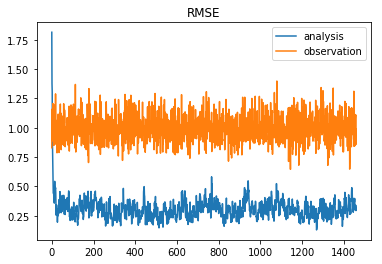

In [16]:
def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1, axis=0) - np.roll(Xa, 2, axis=0)) * np.roll(Xa, 1, axis=0) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def H3(X,mask):
    X_=X[mask]
    return np.sqrt(X_*X_)
def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = H[mask]
    return Ht@dX
def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = H[mask].T
    return Hadj@dY

def Forecast(Xa,Pa):
    h = 0.05 
    F = 8.0
    a = 1.1
    
    X1 = Xa
    E = np.eye(N)
    Xf = Rungekutta4(X1,h,F)
        #M_ = get_linear(X1,h,F)
        #M = M_ @ M
    X1 = Xf
    
    M = np.eye(N)
    MT = np.eye(N)
    #M = get_linear(Xa,h,F,N)
    #Xb = Xa
    #for i in range(N-1):
    #    X = np.vstack([Xb,Xa])
    #    Xb = X
    #X = X.T
    #M = Rungekutta4_t(X,E,h,F)
    #MT = Rungekutta4_adj(E,X,h,F)
    X2 = Xa.reshape(-1,1)
    M = Rungekutta4_t(X2,E,h,F)
    MT = Rungekutta4_adj(E,X2,h,F)
    #print(M,MT)
    Pf = M @ Pa @ MT #カルマンフィルターでは時間発展する、3次元変分法では定数
    Pf = Pf * a
    
    
    #ERRt = Xf - Xt
    #ERRt_ = 0
    #for i in range(N):
    #    ERRt_ += ERRt[i]/N
    #ERRt = ERRt.reshape(40,1)
    #Pft = (ERRt - ERRt_) @ (ERRt - ERRt_).T
    
    return Xf,Pf#,Pft

def Analysis(Xf,Pf,y):
    H = np.eye(N)
    H2 = (H + np.roll(H,1,axis=1))/2
    mask = y>=0
    y_ = y[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    #R = np.eye(p)
    R = np.eye(N)
    I = np.eye(N)
    
    d = y_ - H3(Xf,mask)
    
    """Ex = np.eye(N)
    Ey = np.eye(p)
    H3t=np.zeros((N,p))
    H3adj=np.zeros((p,N))
    for i in range(N):
        H3t[i] = H3_t(Xf,Ex[i],mask)
    for i in range(p):
        H3adj[i] = H3_adj(Xf,Ey[i],mask)
    H3t = H3t.T
    H3adj = H3adj.T"""

    #カルマンゲインの導出
    K = Pf @ H2.T @ np.linalg.inv(H2 @ Pf @ H2.T + R)
    #K = Pf @ H3adj @ np.linalg.inv(H3t @ Pf @ H3adj + R)

    Xa = Xf + K @ (y - H2 @ Xf)
    Pa = (I - K @ H2)@ Pf
    #Xa = Xf + K @ d
    #Pa = (I - K @ H3t)@ Pf
    
    return Xa,Pa

def get_linear(Xa,h,F,N):
    d = 0.00001
    E = np.eye(N)
    MT = []
    MT = [(Rungekutta4(Xa+d*E[j],h,F)-Rungekutta4(Xa,h,F))/d for j in range(N)]
        
    M = np.array(MT).reshape(N,N)
    M = M.T
    return M


t = 1460
N = 40
h = 0.05 
F = 8.0
#初期値
Xa = np.random.randn(N)
X0 = Xa
for j in range(500):
    Xa = Rungekutta4(X0,h,F)
    X0 = Xa
Pa = np.eye(N) * 25
print(Xa)
print(Pa)
    
dataset = pd.read_csv("observation_data2.csv")
y = dataset.values
y = y.reshape(1460,N)
dataset2 = pd.read_csv("data2.csv")
Xt = dataset2.values.reshape(t,N)
X = []
P = []
Pt2 = []
P2 = []
errcov = []
for k in range(t):
    (Xf,Pf) = Forecast(Xa,Pa)
    (Xa,Pa) = Analysis(Xf,Pf,y[k,:])
    X.append(Xa)
    P.append(Pa)
    err = 0
    err = np.sqrt(np.sum(np.diag(Pa))/N)
    errcov.append(err)
    if(k%100==0):
        print(k)
#print(X)
#print(P)
print('end')

N=40
dataset = pd.read_csv("data2.csv")
#print(dataset)
Xt = dataset.values
#print(Xt)

dataset2 = pd.read_csv("observation_data2.csv")
#print(dataset2)
Y = dataset2.values
#print(Y)

Xa = np.array(X)
#print(Xa)

C1 = []
C2 = []
H = np.eye(N)
H2 = (H + np.roll(H,1,axis=1))/2
for i in range(1460):
    X1 = Xa[i]
    X2 = Xt[i]
    X3 = sum((X2-X1)*(X2-X1))/N
    Y1 = Y[i]
    mask = Y1>=0
    #Y1 = Y1[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    #Y2 = sum((H3(X2,mask)-Y1)*(H3(X2,mask)-Y1))/p
    Y2 = sum((H2@X2-Y1)*(H2@X2-Y1))/N
    rmse1 = np.sqrt(X3)
    rmse2 = np.sqrt(Y2)
    C1.append(rmse1)
    C2.append(rmse2)
plt.plot(C1,label="analysis")
plt.plot(C2,label="observation")
plt.legend()
plt.title("RMSE")
#plt.savefig("KFadjoint_3.jpg")
plt.show()

In [12]:
Xa = np.arange(10)
print(Xa)
Xb = Xa
for i in range(9):
    X = np.vstack([Xb,Xa])
    Xb = X
print(X.T)

[0 1 2 3 4 5 6 7 8 9]
[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


In [24]:
N=40
E=np.eye(N)
M=np.eye(N)
MT=np.eye(N)
Xa = np.arange(N)
Xb = Xa
for i in range(N-1):
    X = np.vstack([Xb,Xa])
    Xb = X
#X = X.T
print(Xa,X)
for i in range(N):
    M[:,i] = Rungekutta4_t(Xa,E[:,i],h,F)
    MT[:,i] = Rungekutta4_adj(E[:,i],Xa,h,F)
    
Ma = Rungekutta4_t(X,E,h,F)
MTa = Rungekutta4_adj(E,X,h,F)
print(M-Ma,MT-MTa)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] [[ 0  1  2 ... 37 38 39]
 [ 0  1  2 ... 37 38 39]
 [ 0  1  2 ... 37 38 39]
 ...
 [ 0  1  2 ... 37 38 39]
 [ 0  1  2 ... 37 38 39]
 [ 0  1  2 ... 37 38 39]]
[[ 3.75655550e-01  4.49526786e-01  1.75567900e-02 ...  7.59472622e-02
  -2.18085470e-01 -4.35107619e-01]
 [-5.55633934e-01  0.00000000e+00 -1.45245698e-01 ... -2.00446486e-02
   1.75982066e-02  1.06746454e-01]
 [-2.57265593e-02  1.45245698e-01  0.00000000e+00 ... -1.31720203e-03
   3.38779116e-03  8.17298190e-03]
 ...
 [-3.23976893e-02  2.41515173e-03  5.34598947e-04 ...  0.00000000e+00
   5.32050695e-01  3.97594937e-01]
 [-9.64565130e-03  2.82835296e-02  1.31720203e-03 ... -5.32050695e-01
   0.00000000e+00  8.75981404e-01]
 [ 5.53370195e-01  4.18538624e-02 -4.02709680e-03 ... -4.06221404e-01
  -9.43141778e-01 -3.43523607e-01]] [[-3.43523607e-01 -6.15086003e-01 -2.50872537e-02 ...  2.86711153e-02
   4.95621681e-

### 最小値探索法

[[1.00000000e+00 5.00000000e-01 2.50000000e-01 ... 6.31088724e-30
  3.15544362e-30 1.57772181e-30]
 [5.00000000e-01 1.00000000e+00 5.00000000e-01 ... 1.26217745e-29
  6.31088724e-30 3.15544362e-30]
 [2.50000000e-01 5.00000000e-01 1.00000000e+00 ... 2.52435490e-29
  1.26217745e-29 6.31088724e-30]
 ...
 [6.31088724e-30 1.26217745e-29 2.52435490e-29 ... 1.00000000e+00
  5.00000000e-01 2.50000000e-01]
 [3.15544362e-30 6.31088724e-30 1.26217745e-29 ... 5.00000000e-01
  1.00000000e+00 5.00000000e-01]
 [1.57772181e-30 3.15544362e-30 6.31088724e-30 ... 2.50000000e-01
  5.00000000e-01 1.00000000e+00]] [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  9

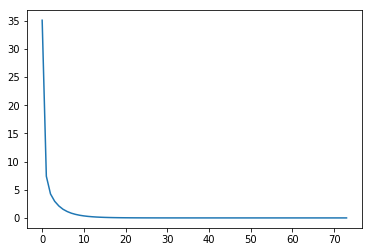

[ 1.          2.          3.          4.          5.          6.
  7.          8.          9.         10.         11.         12.
 13.         14.         15.         16.         17.         18.
 19.         20.         21.         22.         23.         24.
 25.         26.00000001 27.00000001 28.00000001 29.00000001 30.00000001
 31.00000001 32.00000001 33.00000001 34.00000001 35.00000001 36.00000001
 37.00000001 38.00000001 39.00000001 40.00000001 41.00000001 42.00000001
 43.00000001 44.00000001 45.00000001 46.00000001 47.00000001 48.00000001
 49.00000001 50.00000001 51.00000001 52.00000001 53.00000001 54.00000001
 55.00000001 56.00000001 57.00000001 58.00000001 59.00000001 60.00000001
 61.00000001 62.00000001 63.00000001 64.00000001 65.00000001 66.00000001
 67.00000001 68.00000001 69.00000001 70.00000001 71.00000001 72.00000001
 73.00000001 74.00000001 75.00000001 76.00000001 77.00000001 78.00000001
 79.00000001 80.00000001 81.00000001 82.         83.         84.
 85.         86.  

In [42]:
#Gradient descent
N = 100
A = np.ones((N,N))
for i in range(N):
    for j in range(i+1,N):
        A[i,j]=A[i,j]/2**(j-i)
for i in range(N):
    for j in range(i):
        A[i,j]=A[j,i]
b = np.arange(1,N+1)
print(A,b)
E=[]
x0 = b
r = b - A@x0
p = r
for k in range(10000):
    a = np.dot(p,r)/np.dot(p,A@p)
    x = x0 + a*p
    r = b - A@x
    p = r
    x0 = x
    #print(a,x,r)
    err = np.sqrt(np.dot(r,r))
    E.append(err)
    if(err<1e-7):
        print(k,x)
        break
plt.plot(E)
plt.show()
print(A@x)

[[1.00000000e+00 2.50000000e-01 6.25000000e-02 1.56250000e-02
  3.90625000e-03 9.76562500e-04 2.44140625e-04 6.10351562e-05
  1.52587891e-05 3.81469727e-06 9.53674316e-07 2.38418579e-07
  5.96046448e-08 1.49011612e-08 3.72529030e-09 9.31322575e-10
  2.32830644e-10 5.82076609e-11 1.45519152e-11 3.63797881e-12]
 [2.50000000e-01 1.00000000e+00 2.50000000e-01 6.25000000e-02
  1.56250000e-02 3.90625000e-03 9.76562500e-04 2.44140625e-04
  6.10351562e-05 1.52587891e-05 3.81469727e-06 9.53674316e-07
  2.38418579e-07 5.96046448e-08 1.49011612e-08 3.72529030e-09
  9.31322575e-10 2.32830644e-10 5.82076609e-11 1.45519152e-11]
 [6.25000000e-02 2.50000000e-01 1.00000000e+00 2.50000000e-01
  6.25000000e-02 1.56250000e-02 3.90625000e-03 9.76562500e-04
  2.44140625e-04 6.10351562e-05 1.52587891e-05 3.81469727e-06
  9.53674316e-07 2.38418579e-07 5.96046448e-08 1.49011612e-08
  3.72529030e-09 9.31322575e-10 2.32830644e-10 5.82076609e-11]
 [1.56250000e-02 6.25000000e-02 2.50000000e-01 1.00000000e+00
  2.5

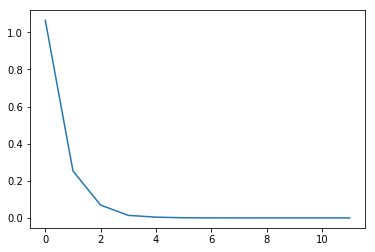

[ 3.32294923e-08  3.11145190e-08  2.19224949e-09 -2.94255895e-08
 -3.16895896e-08  2.41206521e-09  3.44425279e-08  1.29516797e-08
 -2.68196567e-08 -1.09143485e-08  2.90613187e-08 -3.34627508e-08
  3.00600007e-08 -3.79324661e-09 -8.07692935e-09 -7.82746135e-09
  5.19226973e-09  9.16450205e-09 -5.37664135e-10 -8.13333756e-09]


In [64]:
#Conjucate Gradient
N = 20
A = np.ones((N,N))
for i in range(N):
    for j in range(i+1,N):
        A[i,j]=A[i,j]/4**(j-i)
for i in range(N):
    for j in range(i):
        A[i,j]=A[j,i]
b = np.arange(N)
print(A,b)
E=[]
x0 = b
r0 = b - A@x0
p0 = r0
for k in range(10000):
    a = np.dot(p0,r0)/np.dot(p0,A@p0)
    x = x0 + a*p0
    r = r0 - a*A@p0
    err = np.sqrt(np.dot(r,r))
    #print(err)
    E.append(err)
    if(err<1e-7):
        print(k,x)
        break
    y = r-r0
    beta = -np.dot(r,y)/np.dot(p0,y)
    p = r + beta*p0
    
    x0 = x
    p0 = p
    r0 = r
plt.plot(E)
plt.show()
print(A@x-b)

In [7]:
def f(x):
    return x**2-4*x+9

def golden_section():
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        #x1 = x0 - c1*G0@jacobi(x0)
        f1 = f(c1)
        #x2 = x0 - c2*G0@jacobi(x0)
        f2 = f(c2)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            print("end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        print(num,a,b,c1,c2,abs(b-a))
    return a

a = golden_section()
print(a)

0 -10 10 -1.0 1.0 20
1 -1.0 10 1.0 5.798 11.0
2 -1.0 5.798 1.0 1.5968360000000001 6.798
3 1.0 5.798 1.5968360000000001 3.9651639999999997 4.798
4 1.0 3.9651639999999997 1.5968360000000001 2.132692648 2.9651639999999997
5 1.5968360000000001 3.9651639999999997 2.132692648 3.060462704 2.3683279999999995
6 1.5968360000000001 3.060462704 2.132692648 2.155941400928 1.4636267039999997
7 1.5968360000000001 2.155941400928 1.8104142631544962 2.132692648 0.5591054009279999
8 1.8104142631544962 2.155941400928 2.0239500342985215 2.132692648 0.34552713777350386
9 1.8104142631544962 2.132692648 1.9335246061654785 2.0239500342985215 0.32227838484550375
10 1.9335246061654785 2.132692648 2.0239500342985215 2.0566104560192127 0.19916804183452141
11 1.9335246061654785 2.0566104560192127 1.980543400809605 2.0239500342985215 0.12308584985373416
12 1.9335246061654785 2.0239500342985215 1.968067119712301 1.980543400809605 0.090425428133043
13 1.968067119712301 2.0239500342985215 1.980543400809605 2.0026027609

[-0.52966452 -0.06431406] [-54.03820841 -12.45119961]
[[ 0.51137194 -0.48862806]
 [-0.48862806  0.51137194]]
[-0.11183011  0.1155795 ] [-6.14368261  0.72054445]
[[ 0.51059414 -0.48940586]
 [-0.48940586  0.51059414]]
[0.07431951 0.01024564] [5.68087101 1.72869133]
[[ 0.51034972 -0.48965028]
 [-0.48965028  0.51034972]]
[-0.05983067  0.0617376 ] [-3.24054769  0.62940279]
[[ 0.51011864 -0.48988136]
 [-0.48988136  0.51011864]]
[0.03957223 0.00574494] [3.03466673 0.95718239]
[[ 0.51005253 -0.48994747]
 [-0.48994747  0.51005253]]
[-0.03054434  0.03147527] [-1.64322425  0.3896129 ]
[[ 0.50999568 -0.49000432]
 [-0.49000432  0.50999568]]
[0.01989343 0.00356897] [1.54118929 0.51093887]
[[ 0.50997798 -0.49002202]
 [-0.49002202  0.50997798]]
[-0.0149427   0.01536376] [-0.80161655  0.20741858]
[[ 0.50996453 -0.49003547]
 [-0.49003547  0.50996453]]
[0.00934556 0.0019048 ] [0.72914654 0.24972184]
[[ 0.50996045 -0.49003955]
 [-0.49003955  0.50996045]]
[-0.00691021  0.00709482] [-0.37015365  0.09965648]

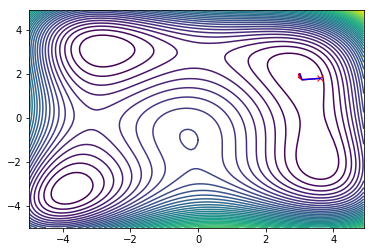

In [9]:
delta = 0.1
minXY=-5.0
maxXY=5.0
nContour=50
alpha=0.01

def J(x,y):
    u"""
    Himmelblau's function
    see Himmelblau's function - Wikipedia, the free encyclopedia 
    http://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    return (x**2+y-11)**2+(x+y**2-7)**2

def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[J(x,y) for (x,y) in zip(X,Y)]
    return(X,Y,Z)

def jacobi(x):
    dx = 4*x[0]**3 + 4*x[0]*x[1] - 42*x[0] +2*x[1]**2 -14
    dy = 2*x[0]**2 + 4*x[0]*x[1] + 4*x[1]**3 -26*x[1] -22
    return np.array([dx,dy])

def golden_section(x0,d0):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 + c1*d0
        f1 = J(x1[0],x1[1])
        x2 = x0 + c2*d0
        f2 = J(x2[0],x2[1])
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a

def CG(start):
    result=[start]
    x0 = start
    d0 = -jacobi(x0)
    for k in range(10000):
        alpha = golden_section(x0,d0)
        x = x0 + alpha*d0
        result.append(x)
        d = jacobi(x)
        if(np.sqrt(np.sum(d**2))<0.001):
            print(k,"end")
            break
        p = -d + (np.dot(d.T,d)/np.dot(d0.T,d0))*d0
        x0 = x
        d0 = p
    return result

def golden_section_N(x0,G0):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 - c1*G0@jacobi(x0)
        f1 = J(x1[0],x1[1])
        #f1 = f(c1)
        x2 = x0 - c2*G0@jacobi(x0)
        f2 = J(x2[0],x2[1])
        #f2 = f(c2)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a  

def quasi_Newton(start):
    I=np.eye(2)
    G0=np.eye(2)
    x0 = start
    result=[start]
    for k in range(10000):
        alpha = golden_section_N(x0,G0)
        x = x0 - alpha*G0@jacobi(x0)
        
        result.append(x)
        if(np.sqrt(np.sum(jacobi(x)**2))<0.001):
            print(k,"end")
            break
        p0 = x - x0
        q0 = jacobi(x) - jacobi(x0)
        print(p0,q0)
        #p0 = p0.reshape(-1,1)
        #q0 = q0.reshape(-1,1)
        G = (I - p0@q0.T/q0.T@p0)@G0@(I - q0@p0.T/q0.T@p0) + p0@p0.T/q0.T@p0
        print(G)
        G0 = G
        x0 = x
        
    return result
        
start=np.array([random.uniform(minXY,maxXY),random.uniform(minXY,maxXY)])

resultn=quasi_Newton(start)
resultc=CG(start)
(X,Y,Z)=CreateMeshData()
CS = plt.contour(X, Y, Z,nContour)
#  plt.clabel(CS, inline=1, fontsize=10)
#  plt.title('Simplest default with labels')

plt.plot(start[0],start[1],"xr");

if(len(resultn)<1000):
    optX=[x[0] for x in resultn]
    optY=[x[1] for x in resultn]
    plt.plot(optX,optY,"-r");

optX=[x[0] for x in resultc]
optY=[x[1] for x in resultc]
plt.plot(optX,optY,"-b");

plt.show()

In [6]:
def makecsv(m,F,df,fname):
    h=0.05
    t=0.0
    N=40
    
    Xa = np.full((N),F)
    Xa[19] += df
    
    X = []
    time = []
    
    for i in np.arange(1,m):
        Xb = Rungekutta4(Xa,h,F)
        Xa=Xb
        t=t+h
        if i > 1460:
            X.append(Xa)
            time.append(t)
        
    df=pd.DataFrame(X)
    df.to_csv(fname,index=False)
    
    dataset = pd.read_csv(fname)
    print(dataset)
    array = dataset.values
    #print(array)
    
    return array

### ほかの観測の作成

$ y_{j} = \frac{x_{j}+x_{j+1}}{2} $

             0         1          2         3         4         5         6  \
0    -4.577655 -2.752373   0.099049  0.677744  5.934551 -0.679750 -2.954209   
1    -3.492238 -2.382872  -0.132460  1.021116  5.995053 -1.253493 -2.160478   
2    -1.737512 -2.129497  -0.155935  1.296183  6.018508 -1.643000 -1.247249   
3     0.132688 -1.731283   0.028431  1.592421  5.997327 -1.819359 -0.291257   
4     1.660538 -1.145299   0.355962  1.971286  5.920252 -1.806988  0.611892   
5     2.613184 -0.497191   0.727151  2.440736  5.775701 -1.667487  1.387096   
6     2.985288  0.076291   1.083551  2.970887  5.556828 -1.471157  2.000461   
7     2.902180  0.527611   1.426230  3.527653  5.259192 -1.275429  2.454620   
8     2.533719  0.894443   1.785871  4.085551  4.872934 -1.115909  2.770881   
9     2.059085  1.242739   2.197940  4.620592  4.377801 -1.004464  2.972569   
10    1.652102  1.619169   2.693192  5.097779  3.745427 -0.928768  3.077689   
11    1.456050  2.045040   3.288462  5.459081  2.951

            0         1          2         3         4         5         6   \
0    -2.878039  0.591952   0.495855  5.181551  2.075622 -3.674536 -1.694007   
1    -2.190684 -2.247978   0.509388  4.682070  1.510716 -0.271545 -1.146887   
2    -1.532801 -0.987649   1.540610  2.525423  1.563944 -2.766673 -1.431760   
3    -0.748637 -1.277241  -0.372908  5.142575  1.710272 -0.171932  1.561375   
4    -0.404949 -1.918470   1.159875  3.097536  0.991758 -0.066493 -0.493602   
5     0.524430  1.251875   1.061251  4.491702  1.892137  0.604550  0.167412   
6     0.826726  1.459632   2.836240  3.173636 -0.361486  1.409252  0.953429   
7     1.847076  1.436641   3.696785  5.857123  2.476929 -0.454759  3.477741   
8     0.490926  2.459326   2.031457  5.678224  2.648774  1.111371  3.828426   
9     3.240344  2.895107   3.840058  1.817501  2.793296  0.351338  2.118861   
10    0.700037  4.325723   2.857514  5.657431  2.183521  2.233725  5.538915   
11    1.694730  3.683729   4.045428  6.287113  2.524

[[0 1 2 3 4]
 [5 6 7 8 9]] [[ 1  3  5  7  4]
 [11 13 15 17 14]]
[[0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]]


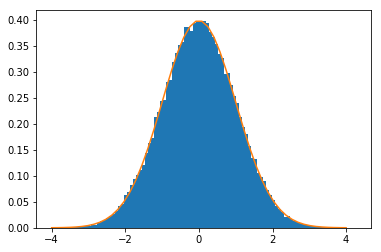

In [46]:
fname="data2.csv"
data = makecsv(2921,8.0,0.008,fname).reshape(1460,-1)
obdata = (data + np.roll(data,-1,axis=1))/2
N = obdata.size
R = []
x = np.linspace(-40,40)
x = x * 0.1
y = np.exp(-x*x/2)/np.sqrt(2*np.pi)
for i in range(N):
    R.append(random.normalvariate(0.0,1.0))
plt.hist(R,bins=100,density=True)
plt.plot(x,y)
oberr = np.array(R).reshape(obdata.shape)
for i in range(1460):
    obdata[i] += oberr[i]
    
df=pd.DataFrame(obdata)
print(df)
df.to_csv("observation_data2.csv",index=False)

d = np.arange(10).reshape(2,5)
d2 = d + np.roll(d,-1,axis=1)
print(d,d2)
H = np.eye(10)
H2 = H/2 + np.roll(H,1,axis=1)/2
print(H2)

$ y_{j} = |x_{j}| $

             0         1          2         3         4         5         6  \
0    -4.577655 -2.752373   0.099049  0.677744  5.934551 -0.679750 -2.954209   
1    -3.492238 -2.382872  -0.132460  1.021116  5.995053 -1.253493 -2.160478   
2    -1.737512 -2.129497  -0.155935  1.296183  6.018508 -1.643000 -1.247249   
3     0.132688 -1.731283   0.028431  1.592421  5.997327 -1.819359 -0.291257   
4     1.660538 -1.145299   0.355962  1.971286  5.920252 -1.806988  0.611892   
5     2.613184 -0.497191   0.727151  2.440736  5.775701 -1.667487  1.387096   
6     2.985288  0.076291   1.083551  2.970887  5.556828 -1.471157  2.000461   
7     2.902180  0.527611   1.426230  3.527653  5.259192 -1.275429  2.454620   
8     2.533719  0.894443   1.785871  4.085551  4.872934 -1.115909  2.770881   
9     2.059085  1.242739   2.197940  4.620592  4.377801 -1.004464  2.972569   
10    1.652102  1.619169   2.693192  5.097779  3.745427 -0.928768  3.077689   
11    1.456050  2.045040   3.288462  5.459081  2.951

            0          1          2          3         4         5   \
0     3.577971   2.749079  -0.293983   0.598659  5.811769 -0.078188   
1     3.622472   2.604226  -1.616321   1.704935  3.346212  0.836169   
2     0.377964   1.865967   0.623538   0.639134  5.149351  1.959116   
3    -0.163420   2.602643   0.337258   3.100635  7.289955  1.336420   
4     0.714991   0.824683   2.194267   0.340867  7.132901  1.277738   
5     2.224730  -0.354322  -0.143807   3.209669  5.420135  3.099623   
6     1.400655   0.740373   1.614214   2.258896  7.277920  0.785106   
7     3.835424   1.307726   2.956769   0.226678  4.331141  0.730728   
8     1.425617  -0.177745   1.349140   4.904052  3.594727  1.001473   
9     1.778208   2.348198   2.550993   4.129699  5.132724  0.507164   
10    2.349295   1.553389   3.187882   4.647248  4.793212  1.517175   
11    1.056467   0.093178   4.931305   4.050894  4.047635  1.557160   
12    3.266491   1.282032   4.048892   4.797808  1.352703  0.593656   
13    

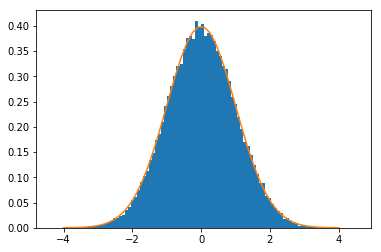

In [7]:

fname="data3.csv"
data = makecsv(2921,8.0,0.008,fname).reshape(1460,-1)
obdata = np.sqrt(data*data)
N = obdata.size
R = []
x = np.linspace(-40,40)
x = x * 0.1
y = np.exp(-x*x/2)/np.sqrt(2*np.pi)
for i in range(N):
    R.append(random.normalvariate(0.0,1.0))
plt.hist(R,bins=100,density=True)
plt.plot(x,y)
oberr = np.array(R).reshape(obdata.shape)
for i in range(1460):
    obdata[i] += oberr[i]
#obdata[obdata<0]=0.0
df=pd.DataFrame(obdata)
print(df)
df.to_csv("observation_data3.csv",index=False)


[[0. 1. 2. ... 3. 2. 1.]
 [1. 0. 1. ... 4. 3. 2.]
 [2. 1. 0. ... 5. 4. 3.]
 ...
 [3. 4. 5. ... 0. 1. 2.]
 [2. 3. 4. ... 1. 0. 1.]
 [1. 2. 3. ... 2. 1. 0.]]
[[1.         0.60653066 0.13533528 ... 0.011109   0.13533528 0.60653066]
 [0.60653066 1.         0.60653066 ... 0.         0.011109   0.13533528]
 [0.13533528 0.60653066 1.         ... 0.         0.         0.011109  ]
 ...
 [0.011109   0.         0.         ... 1.         0.60653066 0.13533528]
 [0.13533528 0.011109   0.         ... 0.60653066 1.         0.60653066]
 [0.60653066 0.13533528 0.011109   ... 0.13533528 0.60653066 1.        ]]


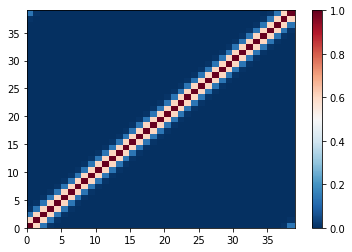

In [14]:
N=40
a=0
p=N-a
sigma=1.0
D = np.zeros((N,p))
L = np.zeros((N,p))

for s in range(N):
    for u in range(N-a):
        D[s,u] = min(abs(s-u),N-abs(s-u))
print(D)        
A=D>5
#print(A)
#print(D[A])
d0=2*np.sqrt(10/3)*sigma
r0=np.exp(-d0**2/(2*sigma**2))
L=np.exp(-D**2/(2*sigma**2))
L[L<r0]=0
x=np.arange(p)
y=np.arange(N)
#P = L*Pf
print(L)
plt.pcolor(x,y,L,cmap='RdBu_r')
plt.colorbar()
#plt.title("L*Pf")
#plt.show()

In [12]:
A = np.array([1,2,0,-3,4,5,0,-6,7,0,8,9]).reshape(3,4)
b = np.array([1,-1,1])
mask = np.empty(A.shape)
m = mask.shape[0]
for i in range(m):
    if(b[i]>0):
        mask[i]=True
    else:
        mask[i]=False
mask = b>0
print(mask)
print(A,A[mask])

[ True False  True]
[[ 1  2  0 -3]
 [ 4  5  0 -6]
 [ 7  0  8  9]] [[ 1  2  0 -3]
 [ 7  0  8  9]]


### OIと3DVarによる実験

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


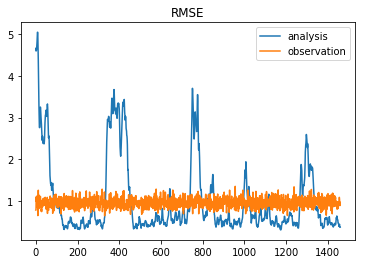

In [4]:
#Optimal Interpolation
def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1) - np.roll(Xa, 2)) * np.roll(Xa, 1) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def H3(X,mask):
    X_=X[mask]
    return np.sqrt(X_*X_)
def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = H[mask]
    return Ht@dX
def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = H[mask].T
    return Hadj@dY

def Forecast(Xa,B):
    h = 0.05
    F = 8.0
    a = 1.1
    
    Xf = Rungekutta4(Xa,h,F)
    #カルマンフィルターでは時間発展する、3次元変分法では定数
    Pf = B
    
    return Xf,Pf

def Analysis(Xf,Pf,y):
    H = np.eye(N)
    H2 = H/2 + np.roll(H,1,axis=1)/2
    mask = y>=0
    y_ = y[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    R = np.eye(p)
    #R = np.eye(N)
    I = np.eye(N)
    
    
    #d = y - H2 @ Xf
    d = y_ - H3(Xf,mask)
    R_inv=np.linalg.inv(R)
    B_inv=np.linalg.inv(Pf)
    
    Ex = np.eye(N)
    Ey = np.eye(p)
    H3t=np.zeros((N,p))
    H3adj=np.zeros((p,N))
    for i in range(N):
        H3t[i] = H3_t(Xf,Ex[i],mask)
    for i in range(p):
        H3adj[i] = H3_adj(Xf,Ey[i],mask)
    H3t = H3t.T
    H3adj = H3adj.T
    #print(H3t,H3adj)
    
    A = B_inv + H3adj @ R_inv @ H3t
    
    #Xa = Xf + np.linalg.inv(B_inv + H2.T @ R_inv @ H2) @ H2.T @ R_inv @ d
    Xa = Xf + np.linalg.inv(A) @ H3adj @ R_inv @ d
    
    return Xa


t = 1460
N = 40
h = 0.05 
F = 8.0

X = []
P = []
Pt2 = []
P2 = []
errcov = []

dataset = pd.read_csv("observation_data3.csv")
y = dataset.values
y = y.reshape(1460,N)
dataset2 = pd.read_csv("data3.csv")
Xt = dataset2.values.reshape(t,N)

#初期値
Xa = np.random.randn(N)
X0 = Xa
for j in range(500):
    Xa = Rungekutta4(X0,h,F)
    X0 = Xa
B = np.eye(N) * 0.2
#B = L*0.2
#print(Xa)
#print(B)
#X.append(Xa
    


for k in range(t):
    (Xf,Pf) = Forecast(Xa,B)
    Xa = Analysis(Xf,Pf,y[k,:])
    X.append(Xa)
    if(k%100==0):
        print(k)
    
Xa = np.array(X)
#print(Xa)

C1 = []
C2 = []
H = np.eye(N)
H2 = H/2 + np.roll(H,1,axis=1)/2
for i in range(1460):
    X1 = Xa[i]
    X2 = Xt[i]
    X3 = sum((X2-X1)*(X2-X1))/N
    Y1 = y[i]
    mask = Y1>=0
    Y1 = Y1[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    #Y2 = sum((H2@X2-Y1)*(H2@X2-Y1))/N
    Y2 = sum((H3(X2,mask)-Y1)*(H3(X2,mask)-Y1))/p
    rmse1 = np.sqrt(X3)
    rmse2 = np.sqrt(Y2)
    C1.append(rmse1)
    C2.append(rmse2)
plt.plot(C1,label="analysis")
plt.plot(C2,label="observation")
#plt.plot(errcov,label="Pa")
plt.legend()
plt.title("RMSE")
#plt.savefig("KFrmse2.jpg")
plt.show()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
0.941320558470315


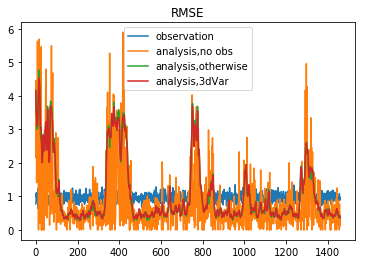

3dVar_abs_rmse_contour.jpg


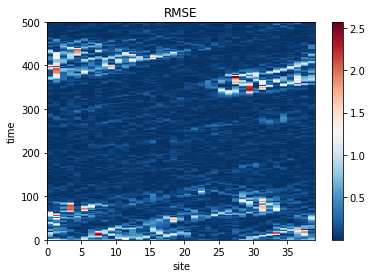

3dVar_abs_ncontour.jpg


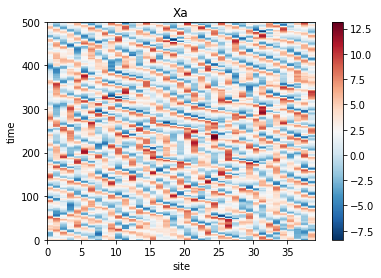

In [5]:
#3dVar
def L96(Xa,F):
    N=len(Xa)
    
    F_ = (np.roll(Xa, -1) - np.roll(Xa, 2)) * np.roll(Xa, 1) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    #K1=np.linspace(1,N,N)
    #K2=np.linspace(1,N,N)
    #K3=np.linspace(1,N,N)
    #K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

#Gradient descent
def GD(A,b):
    x0 = b
    r = b - A@x0
    p = r
    for k in range(10000):
        a = np.dot(p,r)/np.dot(p,A@p)
        x = x0 + a*p
        r = b - A@x
        p = r
        x0 = x
        #print(a,x,r)
        err = np.sqrt(np.dot(r,r))
        if(err<1e-7):
            break
    return x

#Conjucate Gradient
def CG(A,b):
    x0 = b
    r0 = b - A@x0
    p0 = r0
    for k in range(10000):
        a = np.dot(p0,r0)/np.dot(p0,A@p0)
        x = x0 + a*p0
        r = r0 - a*A@p0
        err = np.sqrt(np.dot(r,r))
        #print(err)
        if(err<1e-7):
            break
        y = r-r0
        beta = -np.dot(r,y)/np.dot(p0,y)
        p = r + beta*p0
    
        x0 = x
        p0 = p
        r0 = r
    return x

def J(x,B_inv,H_t,R_inv,d):
    return x.T@B_inv@x/2 + (H_t@x-d).T@R_inv@(H_t@x-d)/2

def jacobi(x,B_inv,H_t,R_inv,d):
    return B_inv@x + H_t.T@R_inv@(H_t@x-d)

def golden_section_N(x0,G0,B_inv,H_t,R_inv,d):
    a0=-10
    b0=10
    t = 0.618 #golden_ratio
    a=a0
    b=b0
    c1=(a+b)/2-1
    c2=(a+b)/2+1
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(1000):
        num+=1
        x1 = x0 - c1*G0@jacobi(x0,B_inv,H_t,R_inv,d)
        f1 = J(x1,B_inv,H_t,R_inv,d)
        #f1 = f(c1)
        x2 = x0 - c2*G0@jacobi(x0,B_inv,H_t,R_inv,d)
        f2 = J(x2,B_inv,H_t,R_inv,d)
        #f2 = f(c2)
        if(f2>f1):
            a=a
            b=c2
            c2_=c1
            c1_=a+(1-t)*(b-a)
        else:
            a=c1
            b=b
            c1_=c2
            c2_=b-(1-t)*(b-a)
        if(abs(b-a)<0.0001):
            #print(num,"end")
            break
        c1 = min(c1_,c2_)
        c2 = max(c1_,c2_)
        #print(num,a,b,c1,c2,abs(b-a))
    return a  

def quasi_Newton(start,B_inv,H_t,R_inv,d):
    I=np.eye(N)
    G0=np.eye(N)
    x0 = start
    result=[start]
    for k in range(10000):
        alpha = golden_section_N(x0,G0,B_inv,H_t,R_inv,d)
        x = x0 - alpha*G0@jacobi(x0,B_inv,H_t,R_inv,d)
        
        result.append(x)
        grad = jacobi(x,B_inv,H_t,R_inv,d)
        if(np.sqrt(np.sum(grad**2)/N)<0.001):
            print(k,"end")
            break
        p0 = x - x0
        q0 = grad - jacobi(x0,B_inv,H_t,R_inv,d)
        print(p0,q0)
        #p0 = p0.reshape(-1,1)
        #q0 = q0.reshape(-1,1)
        G = (I - p0@q0.T/q0.T@p0)@G0@(I - q0@p0.T/q0.T@p0) + p0@p0.T/q0.T@p0
        print(G)
        G0 = G
        x0 = x
        
    return x

def H3(X,mask):
    X_=X[mask]
    return np.sqrt(X_*X_)
def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = H[mask]
    return Ht@dX
def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = H[mask].T
    return Hadj@dY

def Forecast(Xa,B,y):
    h = 0.05
    F = 8.0
    a = 1.1
    
    X1 = Xa
    M = np.eye(N)
    #for i in range(5):
    Xf = Rungekutta4(X1,h,F)
        #M_ = get_linear(X1,h,F)
        #M = M_ @ M
    X1 = Xf
    
    #M = get_linear(Xa,h,F,N)
    #Pf = M @ Pa @ M.T #カルマンフィルターでは時間発展する、3次元変分法では定数
    Pf = B
    for i in range(N):
        if(y[i]<0):
            Pf[i,i]=0.5
        else:
            Pf[i,i]=0.2
    #print(Pf)
    return Xf,Pf

def Analysis(Xf,Pf,y):
    H = np.eye(N)
    H2 = H/2 + np.roll(H,1,axis=1)/2
    mask = y>=0
    y_ = y[mask]
    e = np.ones(N)
    p = int(np.sum(e[mask]))
    R = np.eye(p)
    #R = np.eye(N)
    I = np.eye(N)
    
    
    #d = y - H2 @ Xf
    d = y_ - H3(Xf,mask)
    R_inv=np.linalg.inv(R)
    B_inv=np.linalg.inv(Pf)
    
    Ex = np.eye(N)
    Ey = np.eye(p)
    H3t=np.zeros((N,p))
    H3adj=np.zeros((p,N))
    for i in range(N):
        H3t[i] = H3_t(Xf,Ex[i],mask)
    for i in range(p):
        H3adj[i] = H3_adj(Xf,Ey[i],mask)
    H3t = H3t.T
    H3adj = H3adj.T
    #print(H3t,H3adj)
   
    #A = B_inv + H2.T @ R_inv @ H2
    #b = H2.T @ R @ d
    A = B_inv + H3adj @ R_inv @ H3t
    b = H3adj @ R @ d
    X = CG(A,b)
    #X = quasi_Newton(b,B_inv,H2,R_inv,d)
    Xa = X + Xf
    
    return Xa


t = 1460
N = 40
h = 0.05 
F = 8.0

X = []
P = []
Pt2 = []
P2 = []
errcov = []

dataset = pd.read_csv("observation_data3.csv")
y = dataset.values
y = y.reshape(1460,N)
dataset2 = pd.read_csv("data3.csv")
Xt = dataset2.values.reshape(t,N)

#初期値
Xa = np.random.randn(N)
X0 = Xa
for j in range(500):
    Xa = Rungekutta4(X0,h,F)
    X0 = Xa
B = np.eye(N) * 0.2
#print(Xa)
#print(B)
#X.append(Xa
    

for k in range(t):
    #print(y[k])
    (Xf,Pf) = Forecast(Xa,B,y[k,:])
    Xa = Analysis(Xf,Pf,y[k,:])
    X.append(Xa)
    if(k%100==0):
        print(k)
    
Xa = np.array(X)
#print(Xa)

C1_ = []
C2_ = []
C3_ = []
Cs = []
Cb = []
H = np.eye(N)
H2 = H/2 + np.roll(H,1,axis=1)/2
for i in range(1460):
    X1 = Xa[i]
    X2 = Xt[i]
    X3 = sum((X2-X1)*(X2-X1))/N
    X4 = (X2-X1)*(X2-X1)/N
    Y1 = y[i]
    mask = Y1>=0
    mask_n = np.logical_not(mask)
    Y1 = Y1[mask]
    e = np.eye(N)
    p = int(np.sum(e[mask]))
    #Y2 = sum((H2@X2-Y1)*(H2@X2-Y1))/N
    Y2 = sum((H3(X2,mask)-Y1)*(H3(X2,mask)-Y1))/p
    mask1 = abs(X1)>1
    mask1_n = np.logical_not(mask1)
    #print(X1[mask1],X1[mask1_n],obsnum[i])
    X1sml = X1[mask_n]
    X1big = X1[mask]
    if(X1sml.shape[0]!=0):
        Xsml = sum((X1sml-X2[mask_n])*(X1sml-X2[mask_n]))/X1sml.shape[0]
    else:
        Xsml=0
    if(X1big.shape[0]!=0):
        Xbig = sum((X1big-X2[mask])*(X1big-X2[mask]))/X1big.shape[0]
    else:
        Xbig=0
    rmse1 = np.sqrt(X3)
    rmse2 = np.sqrt(Y2)
    rmse3 = np.sqrt(X4)
    rmses = np.sqrt(Xsml)
    rmseb = np.sqrt(Xbig)
    C1_.append(rmse1)
    C2_.append(rmse2)
    C3_.append(rmse3)
    Cs.append(rmses)
    Cb.append(rmseb)

ERR = np.array(C1_)
print(np.mean(ERR[200:]))
#plt.plot(C1,label="analysis,OI")
plt.plot(C2_,label="observation")
plt.plot(Cs,label="analysis,no obs")
plt.plot(Cb,label="analysis,otherwise")
plt.plot(C1_,label="analysis,3dVar")
#plt.plot(errcov,label="Pa")
plt.legend()
plt.title("RMSE")
plt.savefig("3dVar_abs_obs2.jpg")
plt.show()
fname="3dVar_abs_rmse_contour.jpg"
print(fname)
Rmse = np.array(C3_).reshape(t,N)
X = np.array(X).reshape(t,N)
xs=np.arange(Rmse.shape[1])
time=np.arange(500)
plt.pcolor(xs,time,Rmse[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("RMSE")
plt.savefig(fname)
plt.show()
fname="3dVar_abs_ncontour.jpg"
print(fname)
plt.pcolor(xs,time,X[:500],cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.title("Xa")
plt.savefig(fname)
plt.show()